In [107]:
import qfi_optimization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
reload(qfi_optimization)

sns.set_palette('Set2')

In [109]:
n = 7
a_x= 3
h_z_bounds = (0, 7) ### Bounds in which search best lower QFI local maximum
trace_out_index = np.floor(n / 2)
delta = 0.1
derivative_delta = 1e-3
m_max = int(np.floor((2**(n-1))))
m_max = 5

## m is the variable
DEBUG=True

#results = qfi_optimization.get_best_lower_bound(n, a_x, delta, 1, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
#results


In [110]:
y = np.zeros((m_max, len(np.arange(h_z_bounds[0], h_z_bounds[1], 0.1))))
for m in range(1, m_max):
    get_t = qfi_optimization.get_lower_bound(
        n, a_x, delta, m, trace_out_index,
        derivative_delta) 
    y[m,:] = (np.array([get_t(h_z)for h_z in np.arange(h_z_bounds[0], h_z_bounds[1], 0.1)]))
                           


optimal at m=1
      message: Solution found.
      success: True
       status: 0
          fun: 5.952650568956307
            x: 3.020165589592838
          nit: 11
         nfev: 11
 value_at_min: 4.299600471897057
 value_at_max: 2.0870694730906965

optimal at m=2
      message: Solution found.
      success: True
       status: 0
          fun: 8.9028843711886
            x: 2.8082733645180937
          nit: 10
         nfev: 10
 value_at_min: 5.4312588300206235
 value_at_max: 2.612515007224125


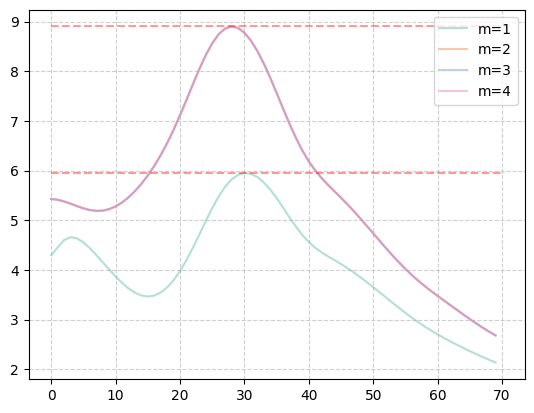

In [114]:
for m in range(1, m_max):
    plt.plot(y[m,:], label=f'm={m}', alpha=0.5)
plt.legend()
print("\noptimal at m=1")
r1 = qfi_optimization.get_best_lower_bound(n, a_x, delta, 1, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
print(r1)
plt.hlines(r1.fun, 0, len(y[1,:]), color='r', alpha=0.4 ,linestyle='--')
print("\noptimal at m=2")
r2 = qfi_optimization.get_best_lower_bound(n, a_x, delta, 2, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
print(r2)
plt.hlines(r2.fun, 0, len(y[1,:]), color='r', alpha=0.4 ,linestyle='--')
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()

In [115]:
results = [qfi_optimization.get_best_lower_bound(n, a_x, delta, m, trace_out_index, derivative_delta, h_z_bounds=h_z_bounds)
           for m in range(1, m_max)]

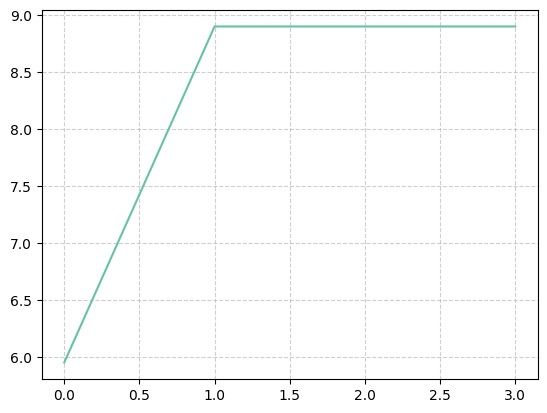

In [117]:
max_lower_bounds = [r.fun for r in results]
plt.plot(max_lower_bounds)

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability